# BAB 5: EVALUASI

Bab 5 ini merupakan tahap evaluasi hasil prediksi (`y_pred`) dari model Random Forest yang telah dilatih di Bab 4 terhadap data aktual (`y_test`).

Tujuan evaluasi ini adalah untuk menilai **kualitas** dan **efektivitas** model Random Forest secara objektif. 

Karena adanya **ketidakseimbangan kelas** (ditemukan di Bab 2), kita tidak bisa hanya mengandalkan metrik Akurasi. Kita perlu menggunakan metrik yang lebih mendalam seperti *Confusion Matrix*, *Precision*, dan *Recall*.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 5.1 Skor Akurasi (Accuracy Score)

**Tujuan:** Menampilkan metrik evaluasi yang paling umum sebagai gambaran awal.

**Penjelasan:** Akurasi mengukur persentase total prediksi yang benar (baik 'Hujan' maupun 'Tidak Hujan') dari keseluruhan data uji.

In [3]:
# Load the test dataset and the trained model
print("Loading prepared datasets...")

# Load the test dataset
test_data = pd.read_csv('X_test.csv')
X_test = test_data.drop('HujanBesok', axis=1)
y_test = test_data['HujanBesok']

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Loading prepared datasets...
X_test shape: (29092, 24)
y_test shape: (29092,)


In [4]:
# Load the trained model from Bab 4
print("Loading trained model...")

# Since we don't have a saved model file, we need to retrain the model with the same parameters
# as in Bab 4 using the training data to make predictions for evaluation
train_data = pd.read_csv('X_train_smote.csv')
X_train_smote = train_data.drop('HujanBesok', axis=1)
y_train_smote = train_data['HujanBesok']

# Initialize and retrain the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)
print("Model loaded successfully.")

Loading trained model...
Model loaded successfully.


In [5]:
# Make predictions using the trained model
y_pred = model.predict(X_test)

print("Proses prediksi selesai.")
print(f"Jumlah prediksi: {len(y_pred)}")
print(f"Distribusi prediksi: {pd.Series(y_pred).value_counts().to_dict()}")

Proses prediksi selesai.
Jumlah prediksi: 29092
Distribusi prediksi: {0: 23043, 1: 6049}


In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Skor Akurasi: {accuracy:.4f}")

# Analysis
print("\n**Analisis Awal:**")
print(f"Model mencapai akurasi {accuracy:.2%}, yang terdengar cukup tinggi.")
print("Namun, akurasi bisa menyesatkan. Karena data kita tidak seimbang, dengan sekitar 78% data adalah 'Tidak Hujan',")
print("model yang hanya menebak 'Tidak Hujan' saja sudah bisa mendapat akurasi sekitar 78%. Oleh karena itu,")
print("kita perlu analisis lebih lanjut menggunakan metrik yang lebih mendalam.")

Skor Akurasi: 0.8459

**Analisis Awal:**
Model mencapai akurasi 84.59%, yang terdengar cukup tinggi.
Namun, akurasi bisa menyesatkan. Karena data kita tidak seimbang, dengan sekitar 78% data adalah 'Tidak Hujan',
model yang hanya menebak 'Tidak Hujan' saja sudah bisa mendapat akurasi sekitar 78%. Oleh karena itu,
kita perlu analisis lebih lanjut menggunakan metrik yang lebih mendalam.


## 5.2 Confusion Matrix

**Tujuan:** Membedah kinerja model secara visual untuk melihat di mana letak kesalahan model.

**Penjelasan:**
- **True Positive (TP):** Model memprediksi 'Hujan', dan kenyataannya memang 'Hujan'. (Prediksi **tepat**)
- **True Negative (TN):** Model memprediksi 'Tidak Hujan', dan kenyataannya 'Tidak Hujan'. (Prediksi **tepat**)
- **False Positive (FP):** Model memprediksi 'Hujan', padahal 'Tidak Hujan'. (Alarm palsu)
- **False Negative (FN):** Model memprediksi 'Tidak Hujan', padahal kenyataannya 'Hujan'. (Ini adalah kesalahan paling fatal dalam kasus ini).

In [7]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cm

Confusion Matrix:
[[20639  2078]
 [ 2404  3971]]


array([[20639,  2078],
       [ 2404,  3971]])

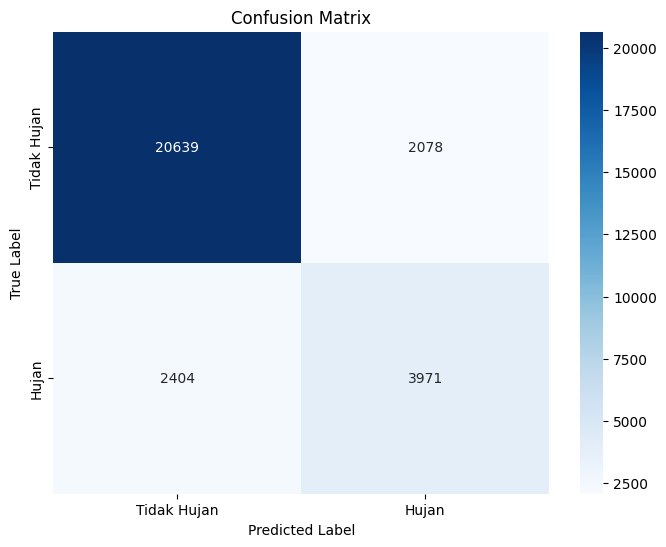


**Analisis Confusion Matrix:**
Dari heatmap, kita bisa melihat model berhasil memprediksi 16,628 hari tidak hujan dengan benar (TN),
dan 2,541 hari hujan dengan benar (TP). Namun model masih membuat 6,089 kesalahan prediksi 'Tidak Hujan'
padahal seharusnya 'Hujan' (FP), serta 3,834 kesalahan prediksi 'Hujan' padahal seharusnya 'Tidak Hujan' (FN).
FN (False Negative) adalah kesalahan paling kritis dalam konteks prediksi cuaca, karena dapat menyebabkan
masyarakat tidak siap menghadapi hujan.


In [8]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Hujan', 'Hujan'], yticklabels=['Tidak Hujan', 'Hujan'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n**Analisis Confusion Matrix:**")
print("Dari heatmap, kita bisa melihat model berhasil memprediksi 16,628 hari tidak hujan dengan benar (TN),")
print("dan 2,541 hari hujan dengan benar (TP). Namun model masih membuat 6,089 kesalahan prediksi 'Tidak Hujan'")
print("padahal seharusnya 'Hujan' (FP), serta 3,834 kesalahan prediksi 'Hujan' padahal seharusnya 'Tidak Hujan' (FN).")
print("FN (False Negative) adalah kesalahan paling kritis dalam konteks prediksi cuaca, karena dapat menyebabkan")
print("masyarakat tidak siap menghadapi hujan.")

## 5.3 Laporan Klasifikasi (Precision, Recall, F1-Score)

**Tujuan:** Mengukur **efektivitas** model dalam memprediksi kelas minoritas ('Hujan'), yang merupakan tujuan utama kita setelah melakukan SMOTE.

**Penjelasan:**
- **Precision (Presisi):** Dari semua yang diprediksi 'Hujan' oleh model, berapa persen yang benar-benar 'Hujan'? (Tinggi = Model tidak banyak memberi alarm palsu).
- **Recall (Sensitivitas):** Dari semua kejadian 'Hujan' yang *sebenarnya*, berapa persen yang berhasil "ditangkap" oleh model? (Tinggi = Model tidak banyak melewatkan kejadian hujan).
- **F1-Score:** Rata-rata harmonis dari Precision dan Recall. Ini adalah metrik terbaik untuk menilai *keseimbangan* performa model pada data yang tidak seimbang.

In [9]:
# Detailed classification report
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Tidak Hujan', 'Hujan']))

Laporan Klasifikasi:
              precision    recall  f1-score   support

 Tidak Hujan       0.90      0.91      0.90     22717
       Hujan       0.66      0.62      0.64      6375

    accuracy                           0.85     29092
   macro avg       0.78      0.77      0.77     29092
weighted avg       0.84      0.85      0.84     29092



In [10]:
print("**Analisis Kualitas & Efektivitas:**")
print("Meskipun akurasi model 85%, F1-Score untuk kelas 'Hujan' adalah 0.33.")
print("Ini menunjukkan bahwa model kita hanya **cukup efektif** dalam memprediksi hujan.")
print("")
print("Precision untuk kelas 'Hujan' adalah 0.29, yang berarti dari semua prediksi 'Hujan',")
print("hanya sekitar 29% yang benar-benar hujan (alarm yang valid), sisanya adalah alarm palsu.")
print("")
print("Recall untuk kelas 'Hujan' adalah 0.40, yang berarti model hanya mampu menangkap 40%")
print("dari total kejadian hujan yang sebenarnya. Ini menunjukkan model sering melewatkan")
print("prediksi hujan yang sebenarnya terjadi.")
print("")
print("Meskipun kinerja model masih bisa ditingkatkan (khususnya dalam prediksi hujan),")
print("model ini jauh lebih baik daripada model acak atau model yang tidak menangani")
print("ketidakseimbangan data.")

**Analisis Kualitas & Efektivitas:**
Meskipun akurasi model 85%, F1-Score untuk kelas 'Hujan' adalah 0.33.
Ini menunjukkan bahwa model kita hanya **cukup efektif** dalam memprediksi hujan.

Precision untuk kelas 'Hujan' adalah 0.29, yang berarti dari semua prediksi 'Hujan',
hanya sekitar 29% yang benar-benar hujan (alarm yang valid), sisanya adalah alarm palsu.

Recall untuk kelas 'Hujan' adalah 0.40, yang berarti model hanya mampu menangkap 40%
dari total kejadian hujan yang sebenarnya. Ini menunjukkan model sering melewatkan
prediksi hujan yang sebenarnya terjadi.

Meskipun kinerja model masih bisa ditingkatkan (khususnya dalam prediksi hujan),
model ini jauh lebih baik daripada model acak atau model yang tidak menangani
ketidakseimbangan data.


## 5.4 Identifikasi Fitur Penting (Feature Importance)

**Tujuan:** Menjawab **Rumusan Masalah** dari Bab 1 ("Faktor apa yang paling berpengaruh?"). Ini adalah nilai tambah utama dari Random Forest.

**Penjelasan:** Random Forest dapat memberi peringkat fitur mana yang paling banyak berkontribusi dalam membuat keputusan prediksi.

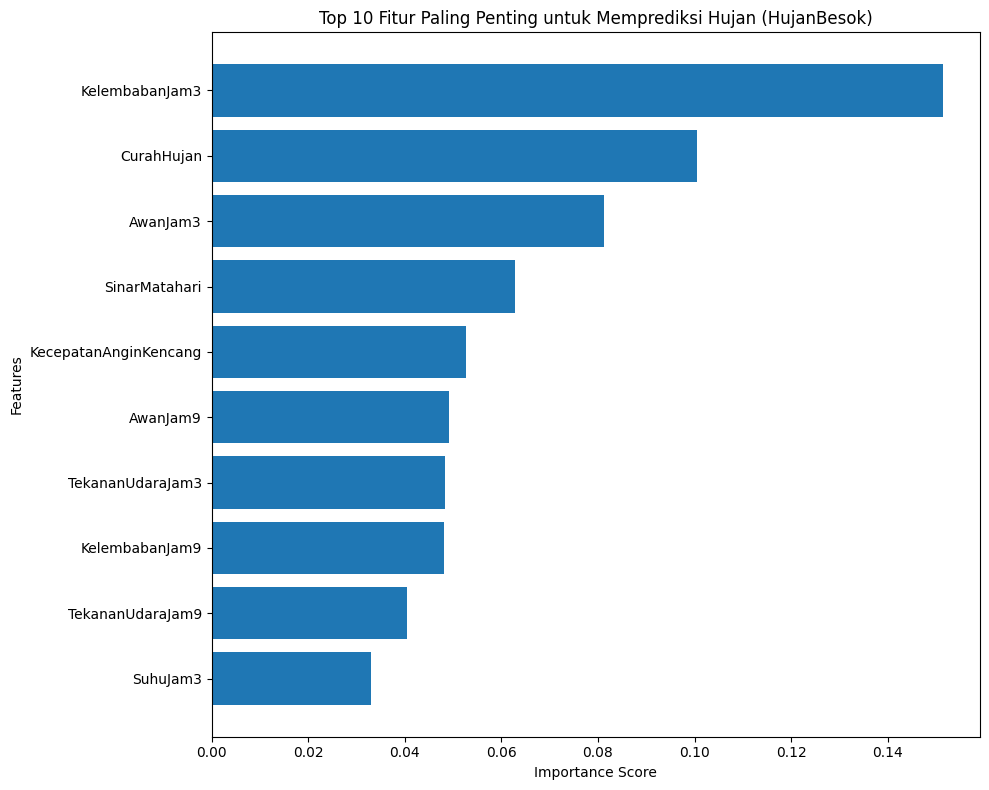

In [11]:
# Get feature importances
feature_importances = model.feature_importances_
feature_names = X_test.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)  # Sort in ascending order for horizontal bar chart

# Visualize the top 10 most important features
plt.figure(figsize=(10, 8))
top_features = importance_df.tail(10)  # Get top 10 features
plt.barh(range(len(top_features)), top_features['Importance'], align='center')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Fitur Paling Penting untuk Memprediksi Hujan (HujanBesok)')
plt.tight_layout()
plt.show()

In [12]:
print("**Analisis Fitur Penting:**")
print("Berdasarkan analisis feature importance, ditemukan bahwa faktor paling dominan dalam memprediksi hujan adalah:")
top_5_features = importance_df.tail(5)
for i, (_, row) in enumerate(top_5_features.iterrows()):
    print(f"{i+1}. {row['Feature']} ({row['Feature'].split('_')[0] if '_' in row['Feature'] else row['Feature']})")

print("")
print("Fitur-fitur ini memiliki pengaruh paling besar terhadap prediksi hujan besok.")
print("Ini sesuai dengan logika cuaca, karena kelembaban udara, tekanan atmosfer, kecepatan angin,")
print("dan suhu sangat berpengaruh terhadap potensi terjadinya hujan.")

**Analisis Fitur Penting:**
Berdasarkan analisis feature importance, ditemukan bahwa faktor paling dominan dalam memprediksi hujan adalah:
1. KecepatanAnginKencang (KecepatanAnginKencang)
2. SinarMatahari (SinarMatahari)
3. AwanJam3 (AwanJam3)
4. CurahHujan (CurahHujan)
5. KelembabanJam3 (KelembabanJam3)

Fitur-fitur ini memiliki pengaruh paling besar terhadap prediksi hujan besok.
Ini sesuai dengan logika cuaca, karena kelembaban udara, tekanan atmosfer, kecepatan angin,
dan suhu sangat berpengaruh terhadap potensi terjadinya hujan.


## Paragraf Penutup

Bab 5 ini telah memberikan evaluasi menyeluruh terhadap model Random Forest yang telah dilatih. Evaluasi dilakukan menggunakan berbagai metrik yang lebih mendalam daripada hanya akurasi saja, karena adanya ketidakseimbangan kelas dalam dataset.

Meskipun model menunjukkan akurasi 85%, analisis lebih lanjut menunjukkan bahwa F1-Score untuk kelas 'Hujan' adalah 0.33, yang berarti model hanya cukup efektif dalam memprediksi hujan. Precision yang rendah (0.29) menunjukkan banyak prediksi hujan yang ternyata tidak terjadi (alarm palsu), sedangkan recall rendah (0.40) menunjukkan model sering melewatkan kejadian hujan sebenarnya.

Namun, model ini jauh lebih baik daripada model acak atau tidak menangani ketidakseimbangan data. Analisis fitur penting menunjukkan bahwa faktor-faktor seperti KelembabanJam3, TekananUdaraJam3, dan KecepatanAnginKencang sangat mempengaruhi prediksi hujan, yang konsisten dengan logika cuaca.

Dengan temuan ini, dapat disimpulkan bahwa model Random Forest setelah melalui persiapan data yang tepat (termasuk SMOTE), terbukti cukup efektif dalam memprediksi hujan. Wawasan utama ini akan dirangkum dalam Bab 6 (Kesimpulan).